# Car Fuel Consumption - Technical Challenge

In [160]:
# useful libraries for the project
import pandas as pd
import numpy as np
import math
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

In [161]:
# reading the file 'measurements.csv' into a pandas DataFrame and finding the first 50 rows with .head()
df = pd.read_csv('measurements.csv', sep=',')
df.head(50)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [162]:
# getting a sample of 10 observations
df_sample = df.sample(10)
df_sample

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
79,"34,8",4,28,20,4,NaN,SP98,0,0,0,NaN,NaN
144,"11,8","4,1",37,"21,5",10,NaN,E10,0,0,0,NaN,NaN
67,"12,3","5,4",55,"21,5",8,NaN,SP98,0,0,0,NaN,NaN
76,"11,8","4,5",39,"21,5",6,NaN,SP98,0,0,0,NaN,NaN
201,"22,2","3,8",42,NaN,15,NaN,SP98,0,0,0,NaN,NaN
20,"25,3","5,5",32,"21,5",3,NaN,E10,0,0,0,NaN,NaN
237,"14,3","4,8",36,"22,5",10,NaN,E10,0,0,0,NaN,NaN
207,"4,9","6,3",26,20,10,NaN,SP98,0,0,0,NaN,NaN
189,"130,3","4,6",85,22,12,NaN,E10,0,0,0,NaN,NaN
200,"19,6","4,9",43,"21,5",13,NaN,SP98,0,0,0,NaN,NaN


In [163]:
# finding dataframe's shape
df.shape
# 388 rows , 12 columns

(388, 12)

In [164]:
# some useful info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [165]:
# columns to a list
list(df.columns)

['distance',
 'consume',
 'speed',
 'temp_inside',
 'temp_outside',
 'specials',
 'gas_type',
 'AC',
 'rain',
 'sun',
 'refill liters',
 'refill gas']

In [166]:
# datatypes of the column
df.dtypes 
# or in a list
# list(zip(df.columns,df.dtypes))

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [167]:
# Checking the number of unique features per column
df.nunique()

distance         174
consume           43
speed             60
temp_inside       13
temp_outside      33
specials          12
gas_type           2
AC                 2
rain               2
sun                2
refill liters     10
refill gas         2
dtype: int64

### working with column names

In [168]:
# Standardizing header-column names in the dataframe by using only lowercase letters and replacing the spaces with underscores. 
# The columns are almost standardized
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [169]:
# renaming the columns: temp_inside to temperature_inside, temp_outside to temperature_outside
df = df.rename(columns={'temp_inside':'temperature_inside',
                       'temp_outside':'temperature_outside',
                       'ac':'air_condition'})
list(df.columns)

['distance',
 'consume',
 'speed',
 'temperature_inside',
 'temperature_outside',
 'specials',
 'gas_type',
 'air_condition',
 'rain',
 'sun',
 'refill_liters',
 'refill_gas']

Expanation of the columns:
- distance is the distance in kilometers the driver was driving with his car
- consume is the consumption in liters per 100 kilometers as seen in the display
- speed is the average speed.
- temperature_inside is the setting of the heating or "NaN" if it was turned off
- temperature_outside is the temperature outside, taken at the end of the ride.
- specials is a remark if it was raining, snowing or if the climatization was on ("AC")
- gas_type is the gas type used during the last refill
- air_condition is one hot encoded, the special "AC". 1 for on, 0 for off.
- rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it was good weather.
- sun is one-hot-encoded, means it was sunny enough outside so that the car felt warm 
- refill_liters, how many liters the car was refilled
- refill_gas, how many gas the car was refilled

### checking and dealing with NaN values

In [170]:
# checking which columns have NaN values
df.isna().any()

distance               False
consume                False
speed                  False
temperature_inside      True
temperature_outside    False
specials                True
gas_type               False
air_condition          False
rain                   False
sun                    False
refill_liters           True
refill_gas              True
dtype: bool

In [171]:
# checking how many NaN values are per column
df.isna().sum()

distance                 0
consume                  0
speed                    0
temperature_inside      12
temperature_outside      0
specials               295
gas_type                 0
air_condition            0
rain                     0
sun                      0
refill_liters          375
refill_gas             375
dtype: int64

there are 12 NaN values in temperature_inside column, 295 NaN values in specials column and 375 NaN values in refill_liters​ and refill_gas columns

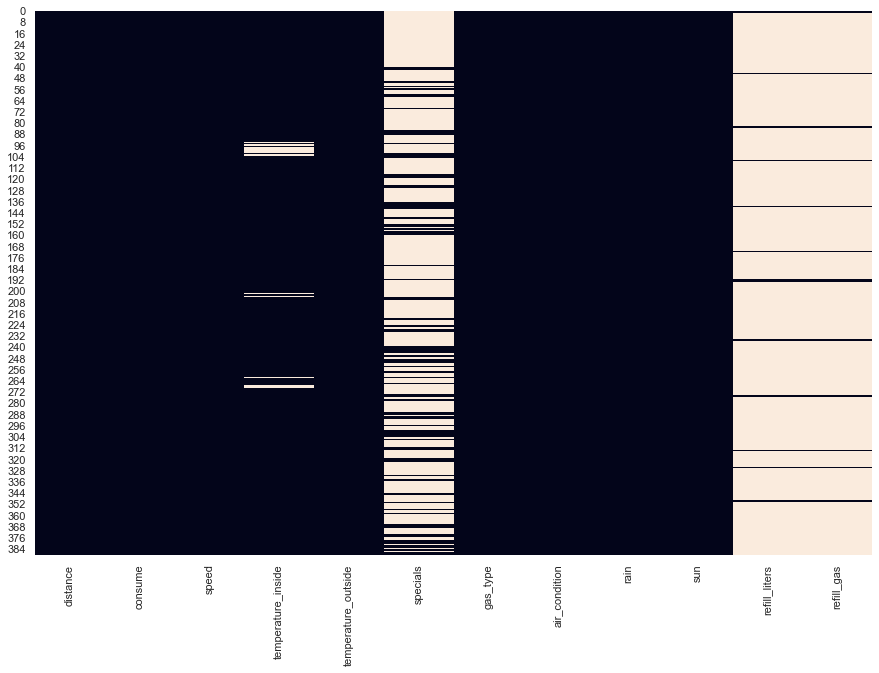

In [172]:
# getting a heatmap with NaN values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

In [173]:
# the percentage of null values per column
df_nan_per = pd.DataFrame( round(df.isna().sum()/len(df),4)*100)
df_nan_per

,0
distance,0.00
consume,0.00
speed,0.00
temperature_inside,3.09
temperature_outside,0.00
specials,76.03
gas_type,0.00
air_condition,0.00
rain,0.00
sun,0.00


96.65% of the columns refill_liters and refill_gas are NaN values and 76.03% of the column specials are NaN values as well.
My first thought is to drop these columns but let's check something else defore dropping them 

In [174]:
# looking for the values and the amount of them,respectively, for every column - feature
for col in df:
    print(df[col].value_counts(), '\n')

11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64 

5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: consume, dtype: int64 

42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     4
27     4
62     4

In [175]:
# we can check that the columns refill_liters and refill_gas have different values and I cannot identify any pattern,
# we have also very few observations, if we do not count the Nan values. So I decided to drop these columns,
# for the column specials I would treat it differently if I had more time, maybe seperating to 2 categories sun and rain and
# then using interpollation or a different technique. Now, I will drop this column as well


df = df.drop(['refill_liters', 'refill_gas', 'specials'], axis=1)
df.head(10)

,distance,consume,speed,temperature_inside,temperature_outside,gas_type,air_condition,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
5,"8,3","6,4",50,"21,5",10,E10,0,0,0
6,"7,8","4,4",43,"21,5",11,E10,0,0,0
7,"12,3",5,40,"21,5",6,E10,0,0,0
8,"4,9","6,4",26,"21,5",4,E10,0,0,0
9,"11,9","5,3",30,"21,5",9,E10,0,0,0


In [176]:
df['temperature_inside'].value_counts()

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temperature_inside, dtype: int64

In [177]:
# checking how many NaN values are per column
df.isna().sum()

distance                0
consume                 0
speed                   0
temperature_inside     12
temperature_outside     0
gas_type                0
air_condition           0
rain                    0
sun                     0
dtype: int64

In [178]:
# removing 12 rows that contain NaN values with the dropna() method
df.dropna(axis=0, inplace=True)
df.isna().sum()

distance               0
consume                0
speed                  0
temperature_inside     0
temperature_outside    0
gas_type               0
air_condition          0
rain                   0
sun                    0
dtype: int64

In [179]:
# new shaoe
df.shape
# 376 rows , 9 columns, so -12 rows and -3 columns from the initial dataset but without NaN values

(376, 9)

In [180]:
# checking again the types of the columns
df.dtypes

distance               object
consume                object
speed                   int64
temperature_inside     object
temperature_outside     int64
gas_type               object
air_condition           int64
rain                    int64
sun                     int64
dtype: object

In [181]:
# list  of the values and their amounts per value in the column distance
list(zip(df['distance'],df['distance'].value_counts()))

[('28', 36),
 ('12', 23),
 ('11,2', 23),
 ('12,9', 17),
 ('18,5', 14),
 ('8,3', 8),
 ('7,8', 6),
 ('12,3', 6),
 ('4,9', 5),
 ('11,9', 5),
 ('12,4', 5),
 ('11,8', 5),
 ('12,3', 5),
 ('24,7', 5),
 ('12,4', 4),
 ('17,3', 4),
 ('33,4', 4),
 ('11,8', 4),
 ('25,9', 4),
 ('11,8', 3),
 ('25,3', 3),
 ('14,2', 3),
 ('17,9', 3),
 ('11,8', 3),
 ('12,3', 3),
 ('12,4', 3),
 ('18,4', 3),
 ('18,4', 3),
 ('18,3', 3),
 ('18,4', 3),
 ('12,3', 3),
 ('11,8', 2),
 ('12,3', 2),
 ('32,6', 2),
 ('19', 2),
 ('12,1', 2),
 ('20', 2),
 ('4,9', 2),
 ('11,8', 2),
 ('12,3', 2),
 ('12,4', 2),
 ('4,5', 2),
 ('11,7', 2),
 ('10,2', 2),
 ('5,4', 2),
 ('2', 2),
 ('14,2', 2),
 ('16', 2),
 ('11,8', 2),
 ('27,3', 2),
 ('11,8', 1),
 ('10,6', 1),
 ('11,6', 1),
 ('13,1', 1),
 ('6,1', 1),
 ('153,5', 1),
 ('11,8', 1),
 ('12,3', 1),
 ('12,4', 1),
 ('12,3', 1),
 ('2,9', 1),
 ('2,1', 1),
 ('9,8', 1),
 ('6,8', 1),
 ('12,4', 1),
 ('12,4', 1),
 ('11,8', 1),
 ('12,3', 1),
 ('14', 1),
 ('11,8', 1),
 ('12,3', 1),
 ('2', 1),
 ('13,9', 1),
 

In [182]:
# we should convert the types of columns distance,consume and temperature_inside to float
df['distance']=df['distance'].str.replace(',','.').astype(float)
df['consume']=df['consume'].str.replace(',','.').astype(float)
df['temperature_inside']=df['temperature_inside'].str.replace(',','.').astype(float)
df.dtypes

distance               float64
consume                float64
speed                    int64
temperature_inside     float64
temperature_outside      int64
gas_type                object
air_condition            int64
rain                     int64
sun                      int64
dtype: object

In [183]:
# describing the numerical features in a dataframe 
df.describe()

,distance,consume,speed,temperature_inside,temperature_outside,air_condition,rain,sun
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000
mean,19.797340,4.925266,41.957447,21.929521,11.340426,0.079787,0.12500,0.082447
std,22.988878,1.040705,13.714354,1.010455,7.066999,0.271325,0.33116,0.275411
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.00000,0.000000
25%,11.800000,4.300000,32.000000,21.500000,6.000000,0.000000,0.00000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.00000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.00000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.00000,1.000000


In [184]:
# describing the categorical feature in a dataframe 
df.describe(include=["bool","object"])

,gas_type
count,376
unique,2
top,SP98
freq,219


### seperating numerical and categorical columns

In [185]:
# checking which columns are numerical¶
df_num = df._get_numeric_data().columns.values
df_num

array(['distance', 'consume', 'speed', 'temperature_inside',
       'temperature_outside', 'air_condition', 'rain', 'sun'],
      dtype=object)

In [186]:
# displaying the numerical columns
df_num = df.select_dtypes(include=['float', 'int'])
df_num.head(3)

,distance,consume,speed,temperature_inside,temperature_outside,air_condition,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0


In [187]:
# displaying the categorical column
df_cat = df.select_dtypes(['object'])
df_cat.tail(3)

,gas_type
385,SP98
386,SP98
387,SP98


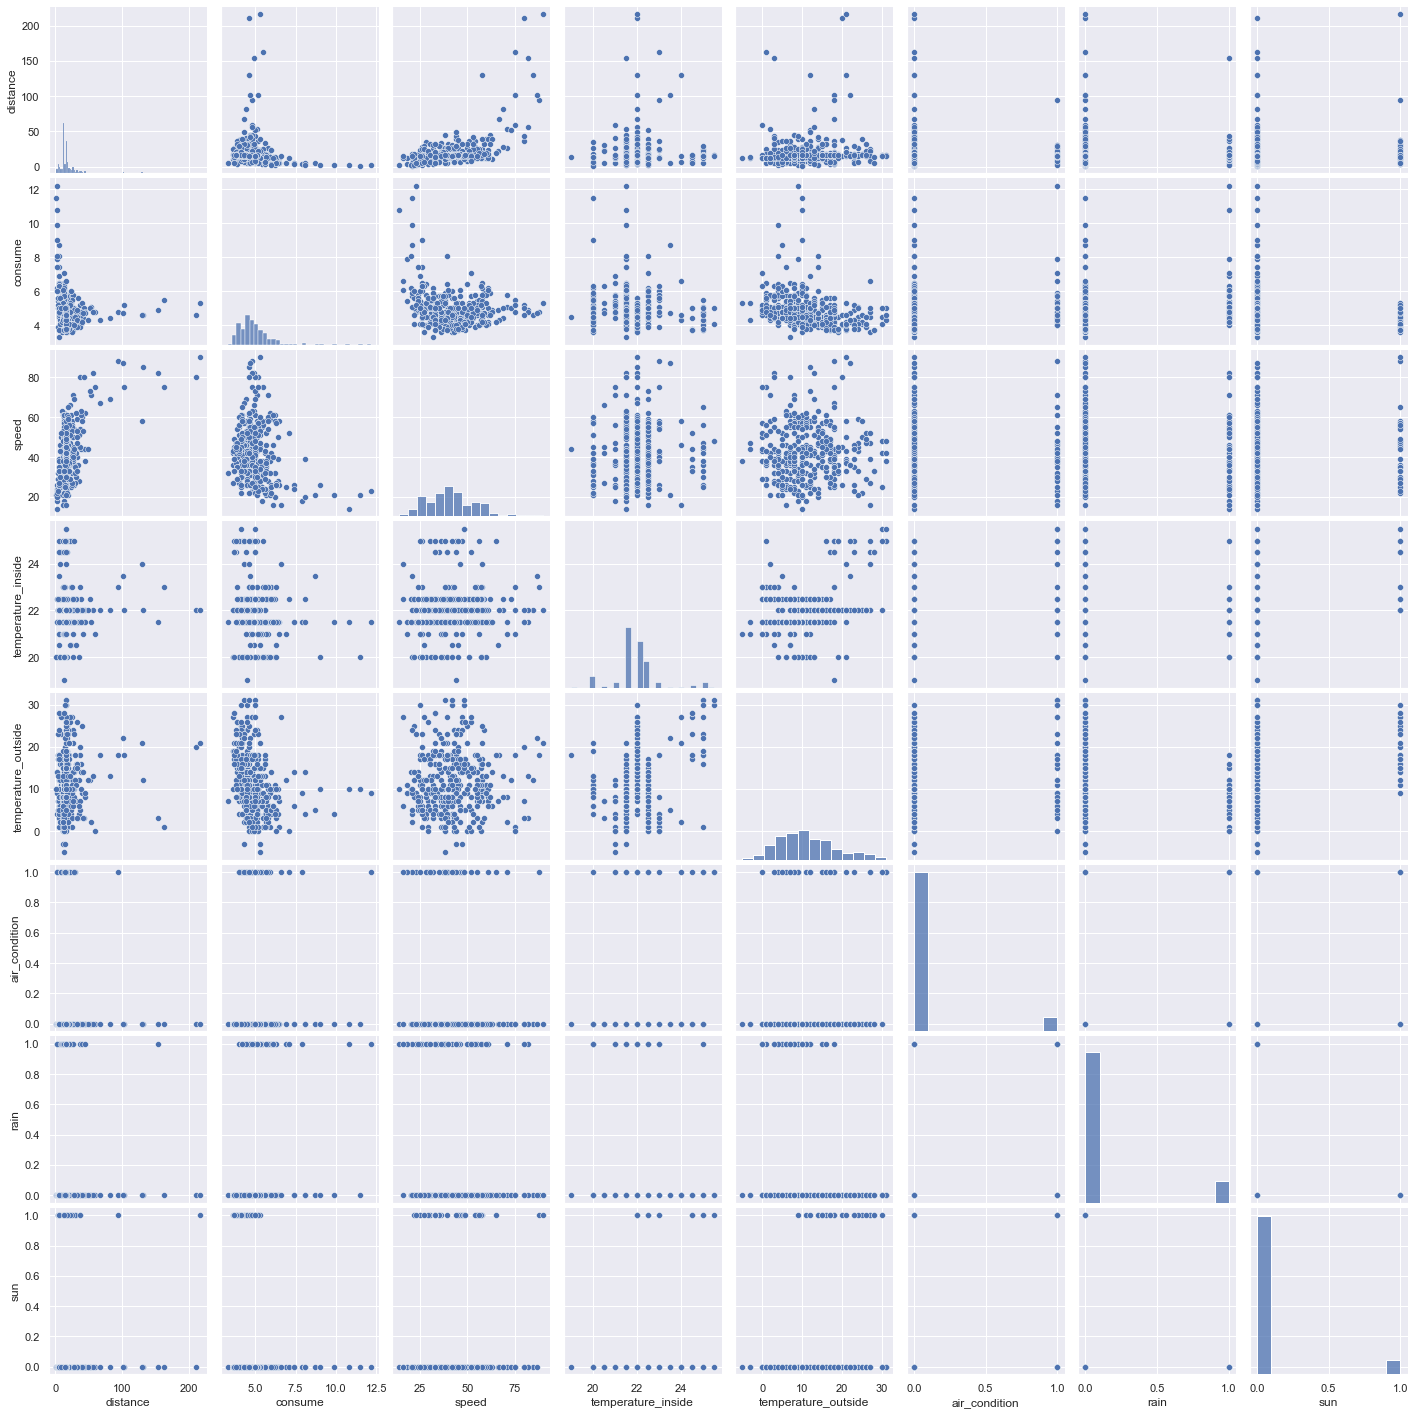

In [188]:
# different plots per numerical pairs
sns.pairplot(df_num)
# we could check some trends

### distribution plots of the numerical variables

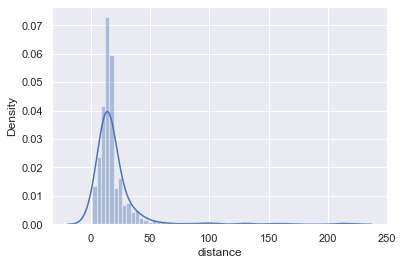

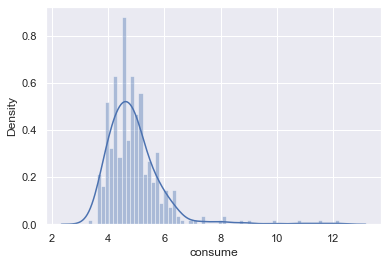

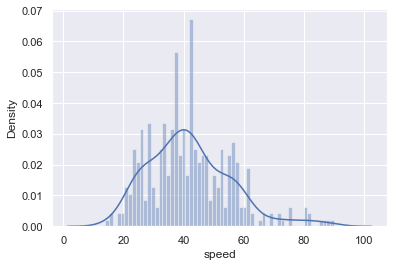

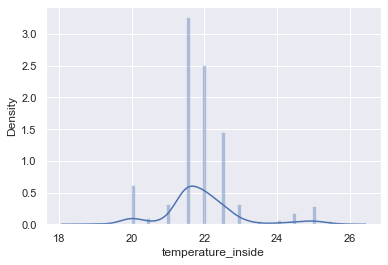

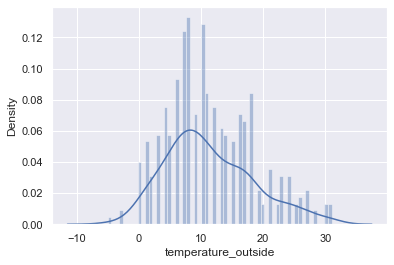

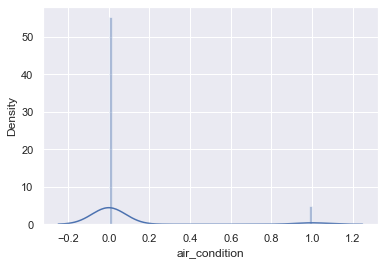

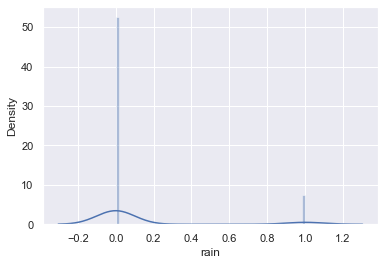

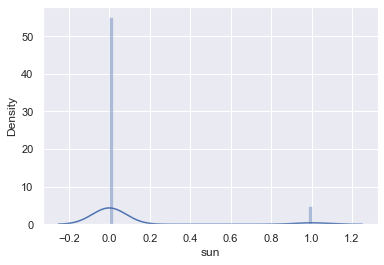

In [189]:
for col in df_num:
    sns.distplot(df_num[col], bins=60)
    plt.show()

The last 3 distribution plots are categorical converted to numerical so we can count every observation, the first 5 distribution plots have almost normal distribution

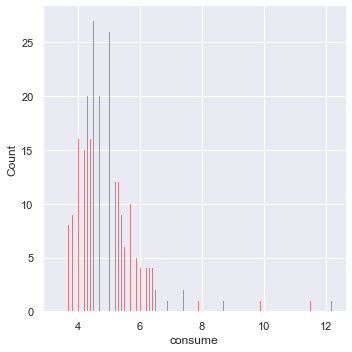

In [190]:
# plotting the distribution plot from the most interesting feature (column consume: will be the target)
sns.displot(data=df, x="consume", color='r', bins=400)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

there are some outliers but most of the observations follow the normal distribution. We will check the outliers with boxplots later on

In [191]:
# creating a new dataframe from the existing dataframe with specific columns in order to use them for scatterplotting
scat_cols= df[['distance','consume', 'speed', 'temperature_inside', 'temperature_outside', 'gas_type', 'air_condition', 'rain', 'sun']]
scat_cols.tail(5)

,distance,consume,speed,temperature_inside,temperature_outside,gas_type,air_condition,rain,sun
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0
387,14.7,5.0,25,25.0,30,SP98,1,0,0


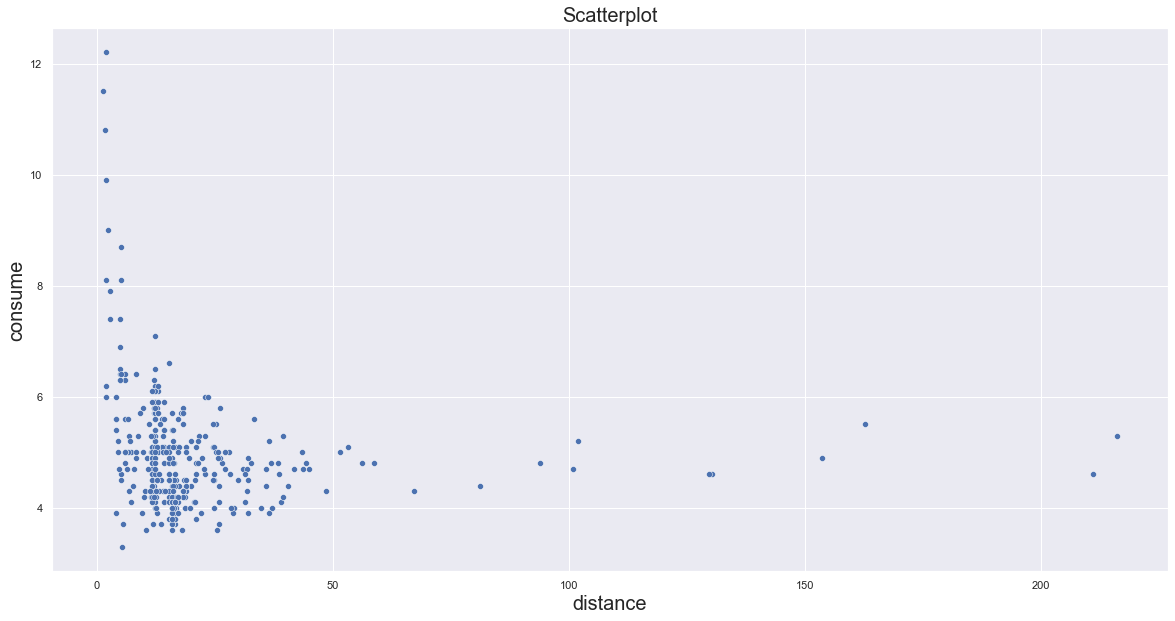

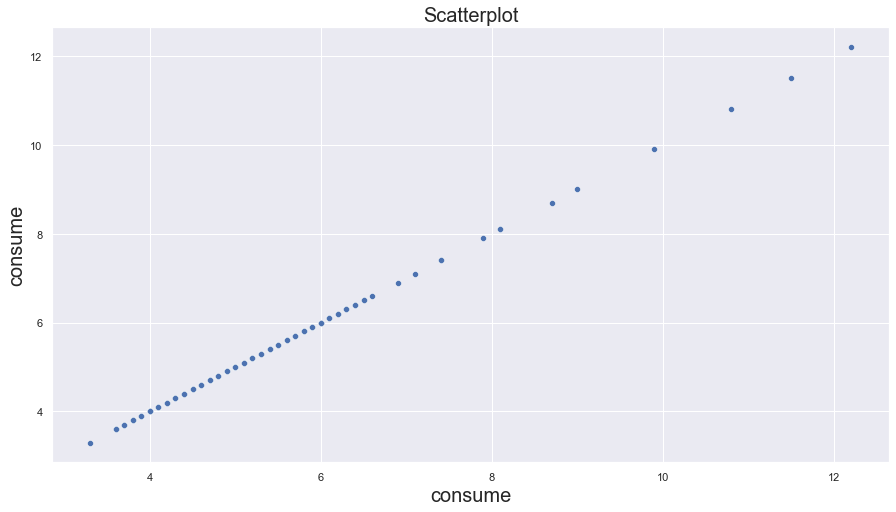

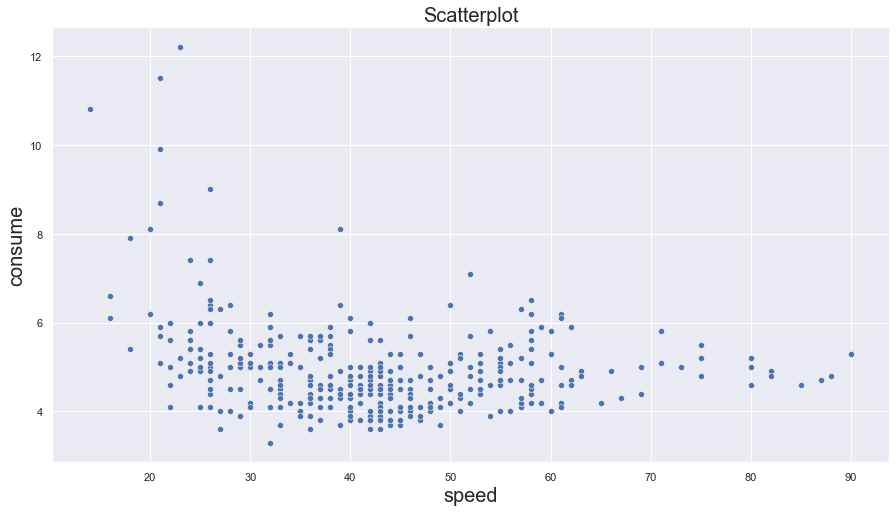

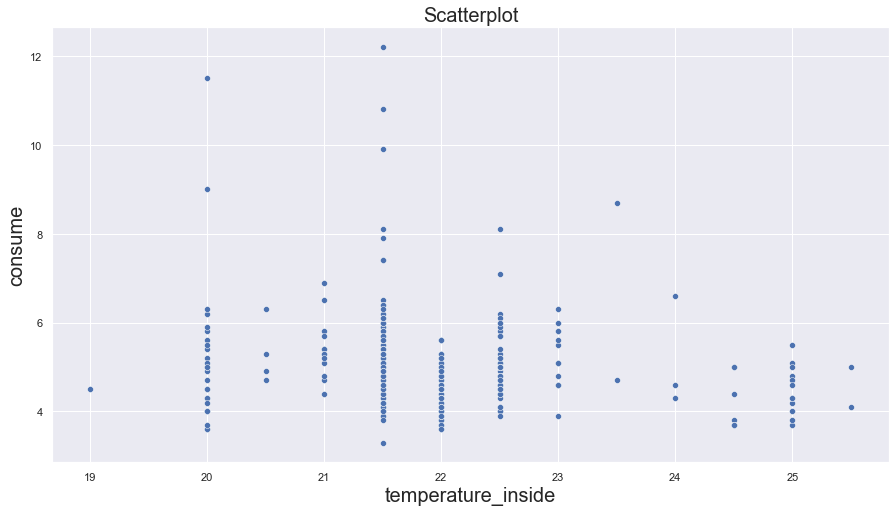

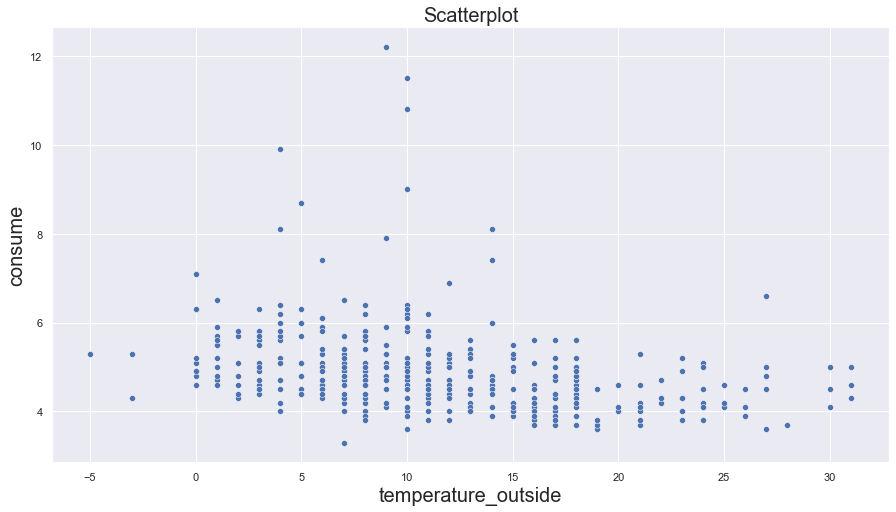

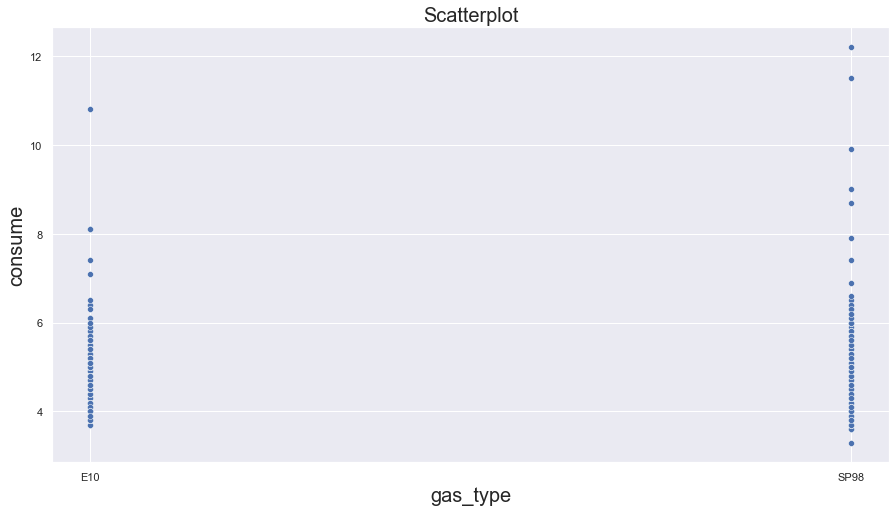

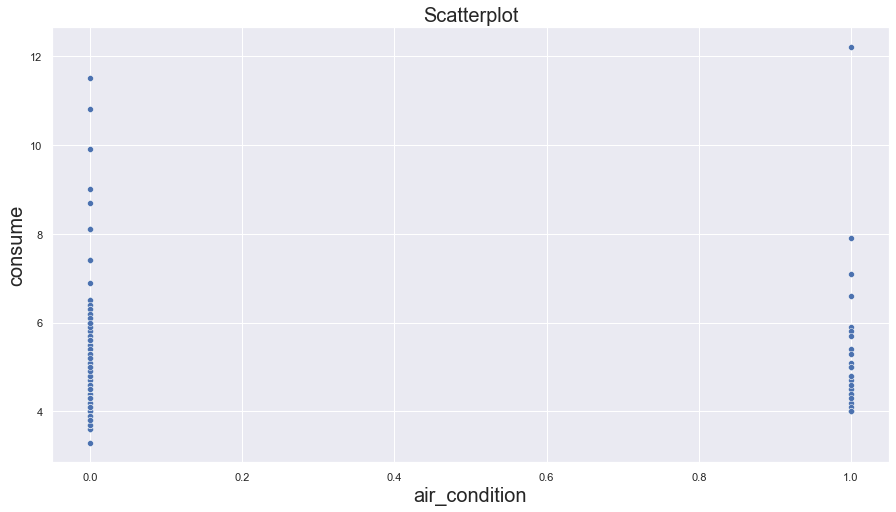

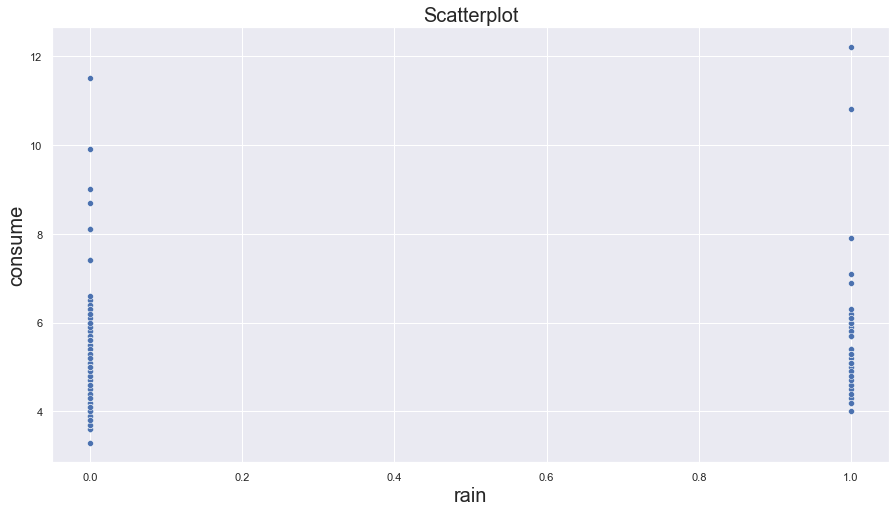

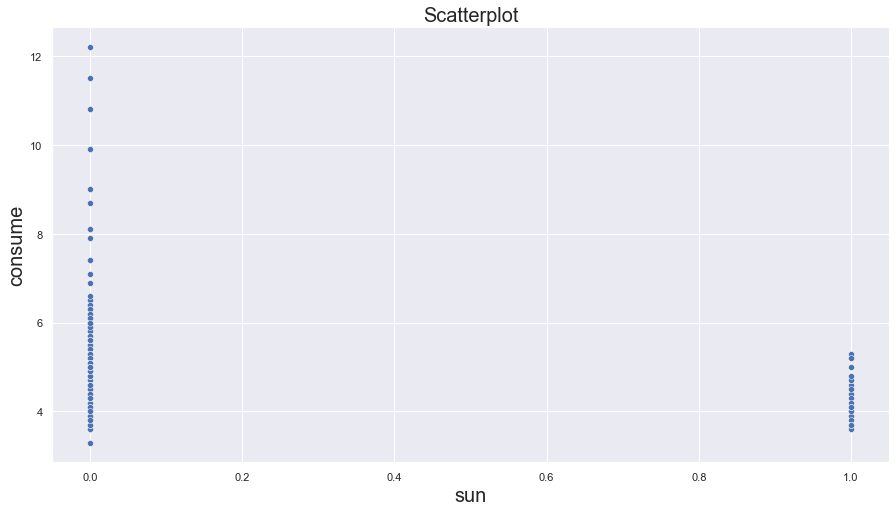

In [192]:
# scatterplotting
for col in scat_cols:
    p = sns.scatterplot(x=scat_cols[col], y=scat_cols['consume'])
    p.set_ylabel("consume", fontsize = 20)
    p.set_xlabel(col, fontsize = 20)
    p.set_title("Scatterplot", fontsize = 20)
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.show()

some insights we can get from the scatterplots
consume - distance: negative exponential distribution , for high distances we have lower consume and for small distances we have high consume but in a negative exponential way
consume - consume: the perfect linear regression as we have the same features
speed - consume: we can notice that in low speed we have some high consume observations, seems to be something between linear and negative exponential distribution, it could also be polynomial, we can fit a trend line in Tableau and check what really happens. We can assume that the low speed is inside a city where we know that consumption is higher than outside a city
temperature_inside - consume: some high consume values exist when the temperature inside are 20 and 22 degrees C, but we don't have a clear picture
temperature_outside - consume: some high consume values exist when the temperature inside are between 4 and 14 degrees C, but we don't have a clear picture
gas_type - consume: sp98 gas type tend to have higher consumption than E10 gas type
air_condition - consume: some times when the car has no air condition the consumption is higher than the times with air condition. Really weird insight but there could be some other factors that effect the consumption
rain - consume: there is no useful insight 
sun - consume: driving without sun tend to have higher consumption

Text(0.5, 0, 'consume')

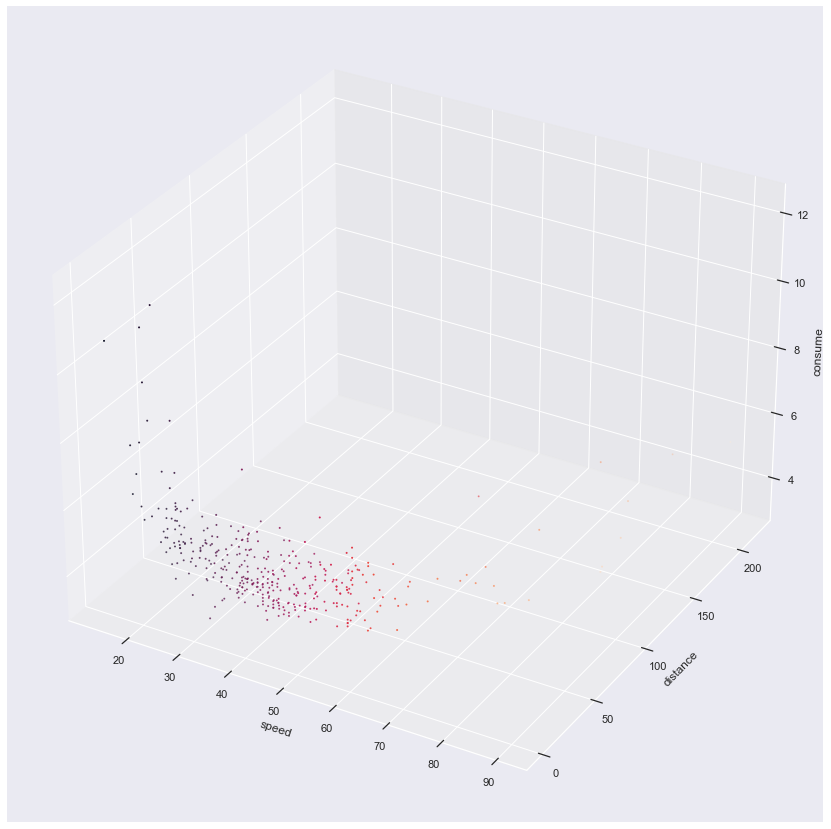

In [193]:
# plotting a 3D plot for distance, speed and consume
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

hp = df['distance']
age = df['speed']
price = df['consume']

ax.scatter3D(age, hp, price, c=df['speed'], s=1)
ax.set_xlabel('speed')
ax.set_ylabel('distance')
ax.set_zlabel('consume')

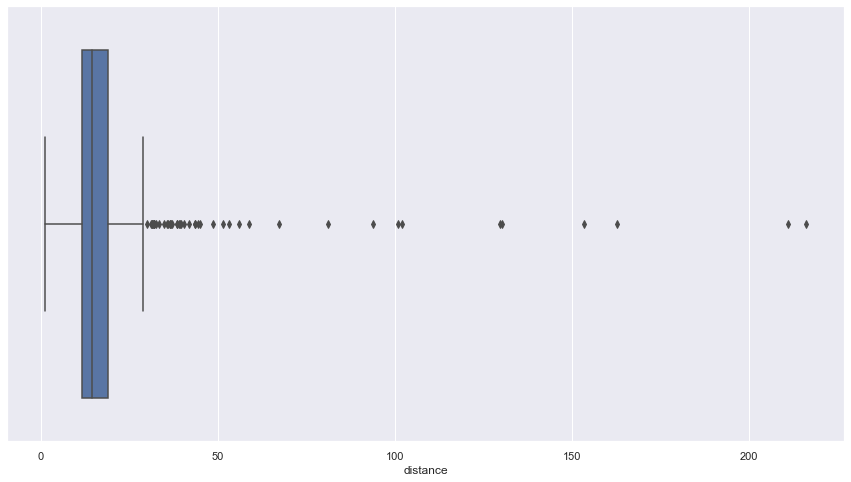

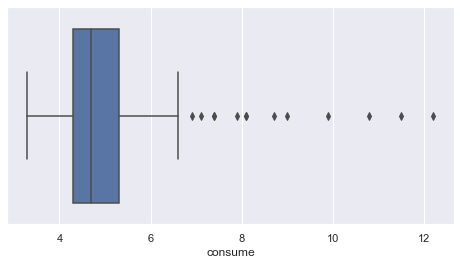

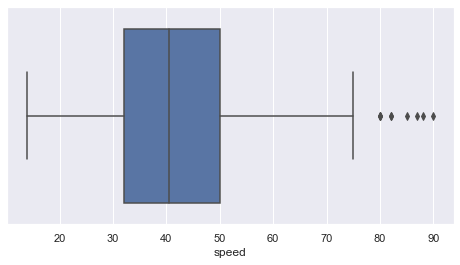

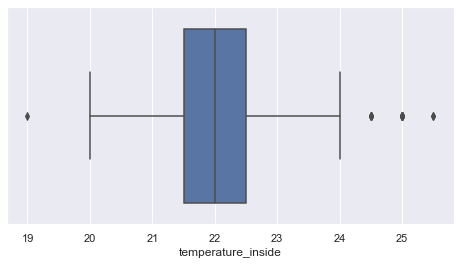

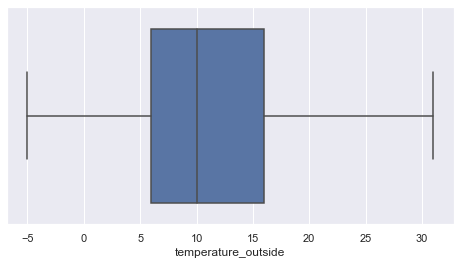

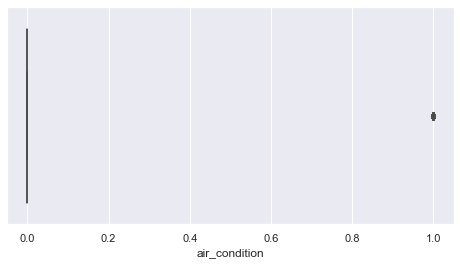

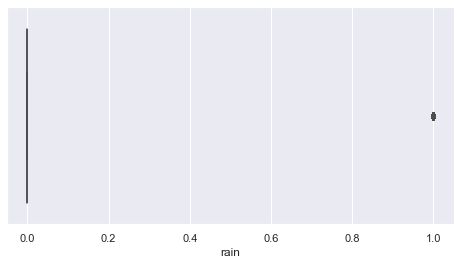

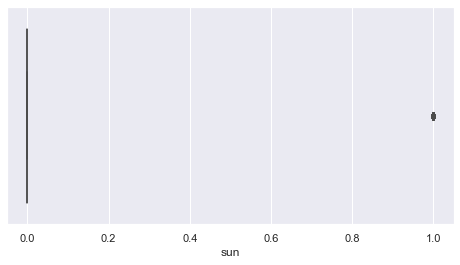

In [194]:
# checking the outliers in the numerical variables with boxplots
for col in df_num:
    sns.boxplot(df_num[col])
    sns.set(rc = {'figure.figsize':(8,4)})
    plt.show()

most of the features follow the normal distribution and they do not have extreme outliers, we can notice only some outliers in features distance and consume

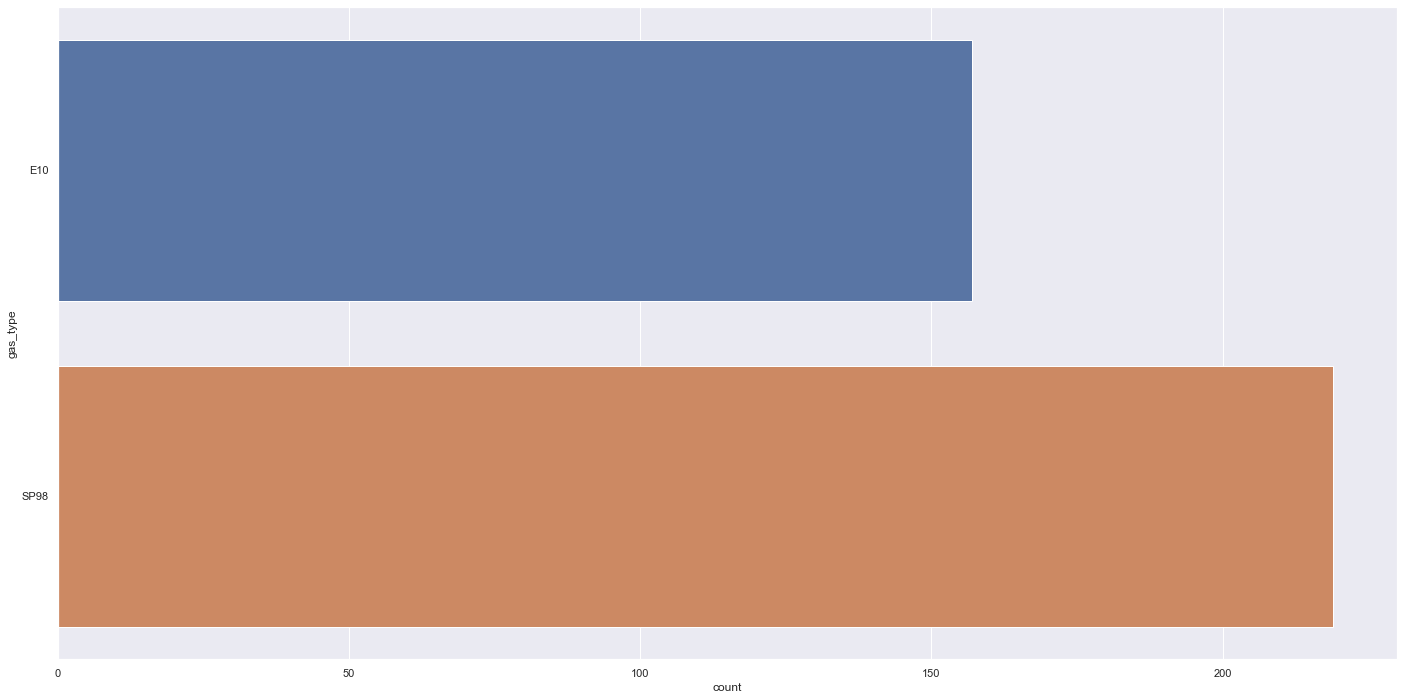

In [195]:
# counting the categorical non hot encoded part of the data
plt.figure(figsize=(24,12))
sns.countplot(y ='gas_type', data= df)
# sns.set(rc = {'figure.figsize':(24,12)})
plt.show()

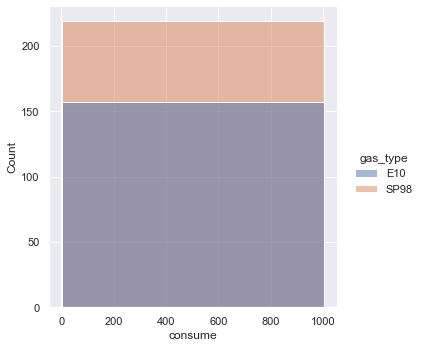

In [196]:
# a plot of consume by the gas_type to check trends in consumption based on gas_type
sns.displot(data=df, x="consume", hue="gas_type", binwidth=1000)

In [197]:
# some low consumption observations
low_consumption_observations = df[(df.consume<df['consume'].quantile(0.10))]
low_consumption_observations

,distance,consume,speed,temperature_inside,temperature_outside,gas_type,air_condition,rain,sun
3,12.9,3.9,36,21.5,14,E10,0,0,0
44,5.4,3.3,32,21.5,7,SP98,0,0,0
73,9.7,3.9,42,21.5,8,SP98,0,0,0
82,10.5,3.6,42,20.0,10,SP98,0,0,0
208,18.1,3.6,36,20.0,19,SP98,0,0,0
209,25.9,3.7,39,20.0,21,SP98,0,0,0
253,17.0,3.9,46,22.5,14,E10,0,0,1
265,4.2,3.9,29,22.0,18,E10,0,0,1
270,16.0,3.8,41,22.0,12,E10,0,0,0
280,16.0,3.9,42,22.0,8,SP98,0,0,0


we can notice that most of the low consumption observations are related with small distances, low speed, inside temperature in the range of 20-25 C degrees, outside temperature in the range of 10-25 C degrees, without air condition and without rain or snow

In [198]:
# some high consumption observations
high_consumption_observations = df[(df.consume>df['consume'].quantile(0.90))]
high_consumption_observations

,distance,consume,speed,temperature_inside,temperature_outside,gas_type,air_condition,rain,sun
5,8.3,6.4,50,21.5,10,E10,0,0,0
8,4.9,6.4,26,21.5,4,E10,0,0,0
37,4.9,7.4,26,21.5,6,E10,0,0,0
39,12.3,6.5,58,21.5,7,E10,0,0,0
45,2.0,9.9,21,21.5,4,SP98,0,0,0
53,13.1,6.1,46,21.5,6,SP98,0,1,0
54,6.1,6.4,28,21.5,8,SP98,0,0,0
57,12.3,6.2,61,21.5,8,SP98,0,0,0
60,2.9,7.9,18,21.5,9,SP98,1,1,0
61,2.1,12.2,23,21.5,9,SP98,1,1,0


we can notice that most of the high consumption observations are related with small distances again, average speed, inside temperature in the range of 20-22.5 C degrees, outside temperature in the range of 0-10 C degrees and without sun. 
But we can check better the insights with the correlations matrix

### numerical features' correlations

In [199]:
# to hide the repeat half of the heatmap we use the following mask
mask = np.zeros_like(df_num.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

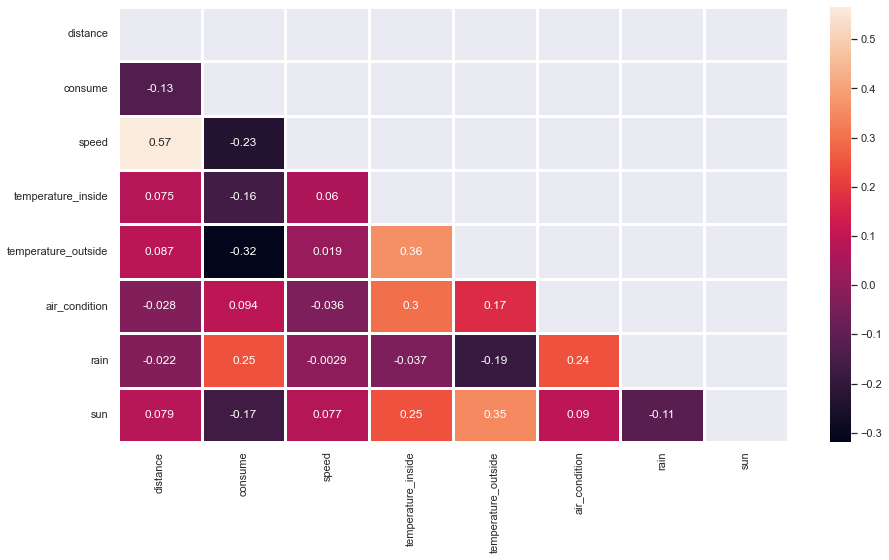

In [200]:
# the correlations matrix from numerical columns
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

Let's define as 0.90 the threshold for multicollinearity, there is no pair with correlation greater than 0,9, so we will not drop any feature and there is no multicollinearity

In [201]:
for i in df_num:
    correlation_with_consume = df_num[i].corr(df_num['consume'])
    print(i,'has correlation with consume: ', round(correlation_with_consume ,2))
# sorting the correlations
df_num.corr()['consume'].sort_values(ascending=False)

distance has correlation with consume:  -0.13
consume has correlation with consume:  1.0
speed has correlation with consume:  -0.23
temperature_inside has correlation with consume:  -0.16
temperature_outside has correlation with consume:  -0.32
air_condition has correlation with consume:  0.09
rain has correlation with consume:  0.25
sun has correlation with consume:  -0.17


consume                1.000000
rain                   0.247699
air_condition          0.093892
distance              -0.131379
temperature_inside    -0.161991
sun                   -0.169173
speed                 -0.234537
temperature_outside   -0.318758
Name: consume, dtype: float64

the highest correlation is between temperature_outside and consume: -0.318758 (negative correlation). There are various strength of correlation: if |correlation| < 0.3 -> very weak correlation, if 0.3 <|correlation|< 0.5 -> weak correlation, if 0.5 <|correlation|< 0.7 -> moderate correlation, if |correlation|> 0.7 -> strong correlation, where |correlation| is the Absolute value of the value

We will use Linear Regression (supervised lerning) as we have a target (consume) and we can fit the data to the model 

#### column 'consume' is the target variable

In [202]:
# X-y split for the data
# X: independent variables or predictors
# Y: dependent variables or response

y = df['consume']
X = df.drop('consume', axis=1)
print('X is:  \n', X, '\nand y is : ', y )

X is:  
      distance  speed  temperature_inside  temperature_outside gas_type  \
0        28.0     26                21.5                   12      E10   
1        12.0     30                21.5                   13      E10   
2        11.2     38                21.5                   15      E10   
3        12.9     36                21.5                   14      E10   
4        18.5     46                21.5                   15      E10   
..        ...    ...                 ...                  ...      ...   
383      16.0     39                24.5                   18     SP98   
384      16.1     38                25.0                   31     SP98   
385      16.0     45                25.0                   19     SP98   
386      15.4     42                25.0                   31     SP98   
387      14.7     25                25.0                   30     SP98   

     air_condition  rain  sun  
0                0     0    0  
1                0     0    0  
2     

In [203]:
# categorical features and numerical features will be treated differently.¶
# splitting every column except the target in numerical and categorical

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)
X_num

,distance,speed,temperature_inside,temperature_outside,air_condition,rain,sun
0,28.0,26,21.5,12,0,0,0
1,12.0,30,21.5,13,0,0,0
2,11.2,38,21.5,15,0,0,0
3,12.9,36,21.5,14,0,0,0
4,18.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0
384,16.1,38,25.0,31,1,0,0
385,16.0,45,25.0,19,0,0,0
386,15.4,42,25.0,31,1,0,0


In [204]:
# encoding using dummies
df_dummies = pd.get_dummies(X_cat, drop_first = True)
df_dummies

,gas_type_SP98
0,0
1,0
2,0
3,0
4,0
...,...
383,1
384,1
385,1
386,1


In [205]:
# concatenating DataFrames X_num and df_dummies
final_df = pd.concat([X_num, df_dummies], axis=1)
final_df

,distance,speed,temperature_inside,temperature_outside,air_condition,rain,sun,gas_type_SP98
0,28.0,26,21.5,12,0,0,0,0
1,12.0,30,21.5,13,0,0,0,0
2,11.2,38,21.5,15,0,0,0,0
3,12.9,36,21.5,14,0,0,0,0
4,18.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0,1
384,16.1,38,25.0,31,1,0,0,1
385,16.0,45,25.0,19,0,0,0,1
386,15.4,42,25.0,31,1,0,0,1


In [206]:
# independent variables or predictors, final_df = pd.concat([X_num, df_dummies], axis=1)
X_final = final_df

In [207]:
# dependent variables or responses
y_final = df['consume']

In [208]:
# train-test splitting based on the new data
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle = True)

In [209]:
# shapes of the datasets
print('X_train.shape is: ', X_train.shape)
print('X_test.shape is: ', X_test.shape)
print('y_train.shape is: ', y_train.shape)
print('y_test.shape is: ', y_test.shape)

X_train.shape is:  (300, 8)
X_test.shape is:  (76, 8)
y_train.shape is:  (300,)
y_test.shape is:  (76,)


In [210]:
# Applying linear regression. Fit the model in Supervised learning.
# Assuming a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Validation
Finding the R2 score - Coefficient of determination. The coefficient of determination, denoted as 𝑅², tells us which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.¶
MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

In [211]:

predictions = model.predict(X_test)
r2_score(y_test, predictions) # or model.score(X_test, y_test). An unbiased estimation of the predictive
# performance of our model is based on test data


mean_squared_error(y_test, predictions, squared=False)


math.sqrt(mean_squared_error(y_test, predictions, squared=False))


mean_absolute_error(y_test, predictions)

# all of them
print('r2 score is: ', r2_score(y_test, predictions),', RMSE is: ', math.sqrt(mean_squared_error(y_test, predictions, squared=False)), ', MAE is: ', mean_absolute_error(y_test, predictions),'and MSE is: ', mean_squared_error(y_test, predictions, squared=False))

r2 score is:  0.1420397782550522 , RMSE is:  0.9078817468303381 , MAE is:  0.6302941742325031 and MSE is:  0.8242492662277061


Not so good r2 score but we have a benchmark and we will try different approaches, linear regression does not have the best metrics

In [ ]:
# using KNN-K Nearest Neighbors

In [213]:
# checking which k is the best
r2_val=[]
rmse_val = [] 
mse_val = []
mae_val = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
# fitting the model with X_train and y_train datasets
    model.fit(X_train, y_train)  

# make prediction on test set, X_test
    pred=model.predict(X_test) 

    
    r2_k=r2_score(y_test, pred)
    rmse_k=mean_squared_error(y_test, pred, squared=False)
    mse_k=mean_squared_error(y_test, pred)
    mae_k=mean_absolute_error(y_test, pred)
    
    r2_val.append(r2_k)
    rmse_val.append(rmse_k)
    mse_val.append(mse_k)
    mae_val.append(mae_k)
    print('r2 value for  k = ' , K , 'is:', r2_k)
    print('RMSE value for k = ' , K , 'is:', rmse_k)
    print('MSE value for k = ' , K , 'is:', mse_k)
    print('MAE value for k = ' , K , 'is:', mae_k)
    print('\n')

r2 value for  k =  1 is: 0.22517818881455254
RMSE value for k =  1 is: 0.7832960050829747
MSE value for k =  1 is: 0.6135526315789475
MAE value for k =  1 is: 0.5828947368421051


r2 value for  k =  2 is: 0.5354475490839128
RMSE value for k =  2 is: 0.6065161515617397
MSE value for k =  2 is: 0.3678618421052631
MAE value for k =  2 is: 0.4453947368421052


r2 value for  k =  3 is: 0.5710758377425045
RMSE value for k =  3 is: 0.5827942371086192
MSE value for k =  3 is: 0.33964912280701753
MAE value for k =  3 is: 0.4219298245614034


r2 value for  k =  4 is: 0.5709962175871268
RMSE value for k =  4 is: 0.5828483259413477
MSE value for k =  4 is: 0.3397121710526315
MAE value for k =  4 is: 0.43585526315789463


r2 value for  k =  5 is: 0.6139483143119508
RMSE value for k =  5 is: 0.5529014378711634
MSE value for k =  5 is: 0.3057
MAE value for k =  5 is: 0.40815789473684216


r2 value for  k =  6 is: 0.5985251747878013
RMSE value for k =  6 is: 0.5638377529891967
MSE value for k =  6 is:

for k=5 the r2 value is bigger than the rest of ks', so k= gives the best results, the r2 score for k=5 is 0.6139

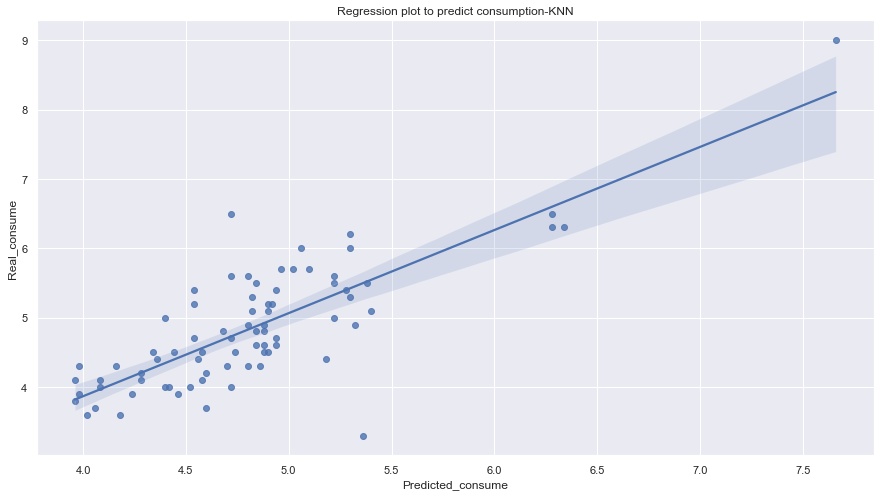

In [215]:
model_k5 = neighbors.KNeighborsRegressor(n_neighbors = 5)
model_k5.fit(X_train, y_train)  
pred_k5=model_k5.predict(X_test)

# regression plot between Predicted_consume-Real_consume using KNN-K Nearest Neighbors
sns.regplot(x=pred_k5, y=y_test)
plt.xlabel('Predicted_consume')
plt.ylabel('Real_consume')
plt.title('Regression plot to predict consumption-KNN');

### Random Forest

In [219]:
model_RandomForestRegressor = RandomForestRegressor(criterion='friedman_mse', max_depth=None, random_state=42, bootstrap=True, n_jobs=-1)
model_RandomForestRegressor.fit(X_train, y_train)
r2_score_RandomForest=model_RandomForestRegressor.score(X_test, y_test)
# Bootstrap: True = sub samples, False = whole dataset

In [220]:
predictions=model_RandomForestRegressor.predict(X_test)
predictions

array([4.714     , 4.874     , 4.651     , 5.128     , 4.662     ,
       4.233     , 5.45      , 5.19308333, 5.08      , 5.018     ,
       5.625     , 3.861     , 4.112     , 5.4535    , 4.72      ,
       5.52002381, 4.409     , 4.66775   , 4.237     , 8.553     ,
       4.756     , 4.133     , 4.641     , 5.09      , 4.657     ,
       4.452     , 4.71533333, 4.722     , 4.99      , 5.071     ,
       4.972     , 6.098     , 4.797     , 5.862     , 5.57325   ,
       4.431     , 5.049     , 4.894     , 4.206     , 5.46702381,
       5.34541667, 4.314     , 5.432     , 5.233     , 4.146     ,
       4.365     , 4.877     , 5.246     , 4.55      , 4.281     ,
       5.301     , 5.15      , 5.18933333, 4.859     , 4.04908333,
       4.401     , 3.847     , 4.116     , 6.536     , 4.164     ,
       6.603     , 4.81533333, 4.58      , 5.461     , 5.2       ,
       5.662     , 5.114     , 4.179     , 5.20025   , 5.592     ,
       3.937     , 3.842     , 4.875     , 6.679     , 4.575  

In [221]:
# metrics for random forest
# MSE (Mean Squared Error) 
MSE_RandomForest = mean_squared_error(y_test, predictions, squared=False)

# RMSE (Root Mean Squared Error) 
RMSE_RandomForest = math.sqrt(mean_squared_error(y_test, predictions, squared=False))

# MAE (Mean absolute error) 
MAE_RandomForest = mean_absolute_error(y_test, predictions)

# all of them
print('r2 score_RandomForest is: ', r2_score_RandomForest,'\n','RMSE_RandomForest is: ', RMSE_RandomForest,'\n', 'MAE_RandomForest is: ', MAE_RandomForest,'\n','and MSE_RandomForest is: ',MSE_RandomForest)
    

r2 score_RandomForest is:  0.6063520204382569 
 RMSE_RandomForest is:  0.74720454186518 
 MAE_RandomForest is:  0.38063972431077686 
 and MSE_RandomForest is:  0.5583146273839537


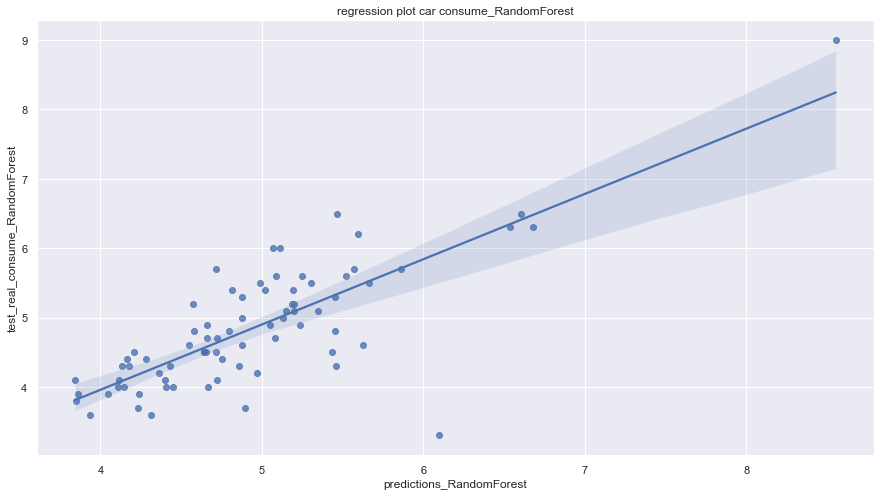

In [222]:
sns.regplot(x=predictions, y=y_test)
plt.xlabel('predictions_RandomForest')
plt.ylabel('test_real_consume_RandomForest')
plt.title('regression plot car consume_RandomForest');

I don't have more time to create other approaches (only 4 hours without being familiar with the dataset), if I had more time I would have used scaling (MinMax, Standard, Normalization, log), maybe PCA, maybe drop some extreme outliers

In [223]:
df.to_excel('output1.xlsx', engine='xlsxwriter')